# BEERS TIMELINE ANALYSIS

In [19]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import src.utils.utilities_beers_analysis as utils_beers
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from collections import Counter

# Import data

In [20]:
original_PATH = 'data/Original'
processed_PATH = 'Processed'

# Loading Data Processed
beer_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/beers_processed_dual.csv')
breweries_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/breweries_processed.csv')
users_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/users_processed.csv')
beer_RB = pd.read_csv(processed_PATH + '/RateBeer/beers_processed_dual.csv')
breweries_RB = pd.read_csv(processed_PATH + '/RateBeer/breweries_processed.csv')
users_RB = pd.read_csv(processed_PATH + '/RateBeer/users_processed.csv')
ratings_RB = pd.read_csv(processed_PATH + '/RateBeer/ratings_processed.csv')
ratings_BA = pd.read_csv(processed_PATH + '/BeerAdvocate/ratings_processed.csv')

Ensurance of data continuity

In [21]:
print(beer_BA.columns)
print(beer_RB.columns)
print(beer_BA.columns == beer_RB.columns)

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'abv',
       'nbr_ratings', 'avg', 'Style_score', 'Overall_score',
       'nbr_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')
Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style', 'abv',
       'nbr_ratings', 'avg', 'Style_score', 'Overall_score',
       'nbr_matched_valid_ratings', 'location', 'location_region', 'US', 'UK',
       'Canada'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


# Initial distribution analysis

In [22]:
ratings_BA.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user', 'year'],
      dtype='object')

### World

In [23]:
ratings_BA_US = ratings_BA[ratings_BA['US_beer']]
ratings_BA_US_loc_year = ratings_BA_US.groupby(['year', 'location_region_user']).size().reset_index(name='num_ratings')
ratings_BA_US_loc_year = ratings_BA_US_loc_year.pivot_table(index='year', columns='location_region_user', values='num_ratings', aggfunc='sum')
ratings_BA_US_loc_year = ratings_BA_US_loc_year.fillna(0).astype(int)
ratings_BA_US_loc_year.head()


ratings_RB_US = ratings_RB[ratings_RB['US_beer']]
ratings_RB_US_loc_year = ratings_RB_US.groupby(['year', 'location_region_user']).size().reset_index(name='num_ratings')
ratings_RB_US_loc_year = ratings_RB_US_loc_year.pivot_table(index='year', columns='location_region_user', values='num_ratings', aggfunc='sum')
ratings_RB_US_loc_year = ratings_RB_US_loc_year.fillna(0).astype(int)
ratings_BA_US_loc_year.head()

location_region_user  Alabama  Alaska  Arizona  Arkansas  California  \
year                                                                   
1996                        0       0        0         0           1   
1998                        0       0        0         0          20   
1999                        0       0        0         0          10   
2000                        0       0        0         0          51   
2001                        0       0        4         0         249   

location_region_user  Colorado  Connecticut  Delaware  Florida  Georgia  ...  \
year                                                                     ...   
1996                         0            0         0        0        0  ...   
1998                         0            0         0        0        0  ...   
1999                         0            0         0        0        0  ...   
2000                         0            0         0        0        0  ...   
2001                         0           28         0       32        0  ...   

location_region_user  South Dakota  Tennessee  Texas  Utah  Vermont  Virginia  \
year                                                                            
1996                             0          0      0     0        0         0   
1998                             0          0      0     0        0         0   
1999                             0          0      0     0        0         0   
2000                             0          0      0     0        0         0   
2001                             0          6     27     0        1        10   

location_region_user  Washington  West Virginia  Wisconsin  Wyoming  
year                                                                 
1996                           0              0          0        0  
1998                           0              0          0        0  
1999                           0              0          0        0  
2000                           0              0          0        0  
2001                           0              0          0        0  

[5 rows x 50 columns]

In [24]:
utils_beers.plot_US_map_data_by_year_user(ratings_BA_US_loc_year)
utils_beers.plot_US_map_data_by_year_user(ratings_RB_US_loc_year)


In [25]:
ratings_BA_loc_year = ratings_BA.groupby(['year', 'location_user']).size().reset_index(name='num_ratings')
ratings_BA_loc_year = ratings_BA_loc_year.pivot_table(index='year', columns='location_user', values='num_ratings', aggfunc='sum')
ratings_BA_loc_year = ratings_BA_loc_year.fillna(0).astype(int)  # Fill NaN with 0 and convert to int
ratings_BA_loc_year.head()
ratings_RB_loc_year = ratings_RB.groupby(['year', 'location_user']).size().reset_index(name='num_ratings')
ratings_RB_loc_year = ratings_RB_loc_year.pivot_table(index='year', columns='location_user', values='num_ratings', aggfunc='sum')
ratings_RB_loc_year = ratings_RB_loc_year.fillna(0).astype(int)  # Fill NaN with 0 and convert to int

In [26]:
utils_beers.plot_world_map_data_by_year(ratings_BA_loc_year)
utils_beers.plot_world_map_data_by_year(ratings_RB_loc_year)

In [27]:
pivot_long_ba = utils_beers.extract_top_beer_per_country(ratings_BA)
pivot_long_rb = utils_beers.extract_top_beer_per_country(ratings_RB)

utils_beers.plot_world_map_data_by_weighted_avg_rating(pivot_long_ba)
utils_beers.plot_world_map_data_by_weighted_avg_rating(pivot_long_rb)




In [28]:
# Filtra per Stati Uniti
ratings_BA_US = ratings_BA[ratings_BA['location_user'] == 'United States']
ratings_RB_US = ratings_RB[ratings_RB['location_user'] == 'United States']

# Calcolo per Beer Advocate
review_counts_BA_US = ratings_BA_US.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_BA_US = pd.merge(ratings_BA_US, review_counts_BA_US, on=['beer_id'])
filtered_reviews_BA_US = reviews_with_counts_BA_US[reviews_with_counts_BA_US['review_count'] >= 5]

weighted_avg_ratings_BA_US = filtered_reviews_BA_US.groupby(
    ['beer_id', 'beer_name', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_BA_US['rank'] = (
    weighted_avg_ratings_BA_US.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)

# Calcolo per RateBeer
review_counts_RB_US = ratings_RB_US.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_RB_US = pd.merge(ratings_RB_US, review_counts_RB_US, on=['beer_id'])
filtered_reviews_RB_US = reviews_with_counts_RB_US[reviews_with_counts_RB_US['review_count'] >= 5]

weighted_avg_ratings_RB_US = filtered_reviews_RB_US.groupby(
    ['beer_id', 'beer_name', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_RB_US['rank'] = (
    weighted_avg_ratings_RB_US.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)



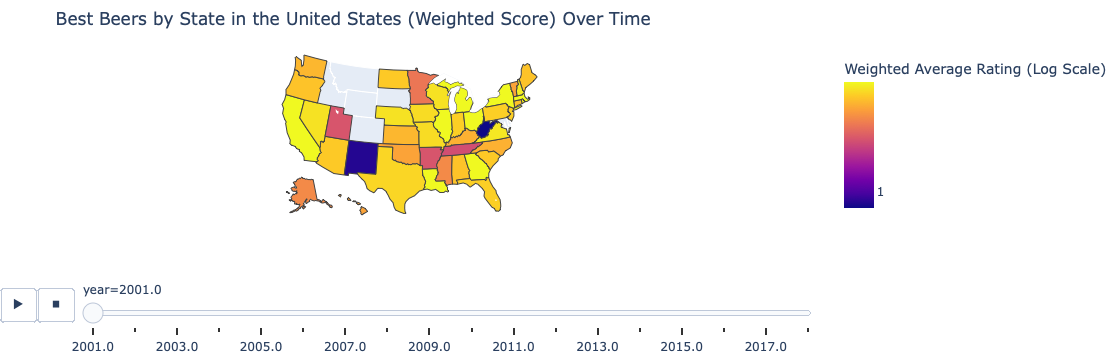

In [29]:
top_ranked_beers_RB_US= weighted_avg_ratings_RB_US[weighted_avg_ratings_RB_US['rank'] == 1]

# Mantieni beer_id e beer_name nel risultato
best_beers_RB_US= top_ranked_beers_RB_US.loc[
    top_ranked_beers_RB_US.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]

# Creazione del pivot per ottenere lo score medio migliore
pivot_data_RB_US = best_beers_RB_US.pivot_table(
    values='weighted_avg_rating',  # Usa il weighted_avg_rating come valore
    index='year',
    columns='location_region_user',
    aggfunc='first'  # Prendi il primo, dato che è già il massimo per ogni gruppo
)

# Ripristina beer_id e beer_name
pivot_long_RB_US = pivot_data_RB_US.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)

# Associa beer_id e beer_name
pivot_long_RB_US = pivot_long_RB_US.merge(
    best_beers_RB_US[['beer_id', 'beer_name', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

# Rimuovi eventuali NaN nei dati risultanti
pivot_long_RB_US = pivot_long_RB_US.dropna(subset=['weighted_avg_rating'])

# Chiama la funzione con il dataset trasformato
utils_beers.plot_US_weighted_avg_map_by_year(pivot_long_RB_US)

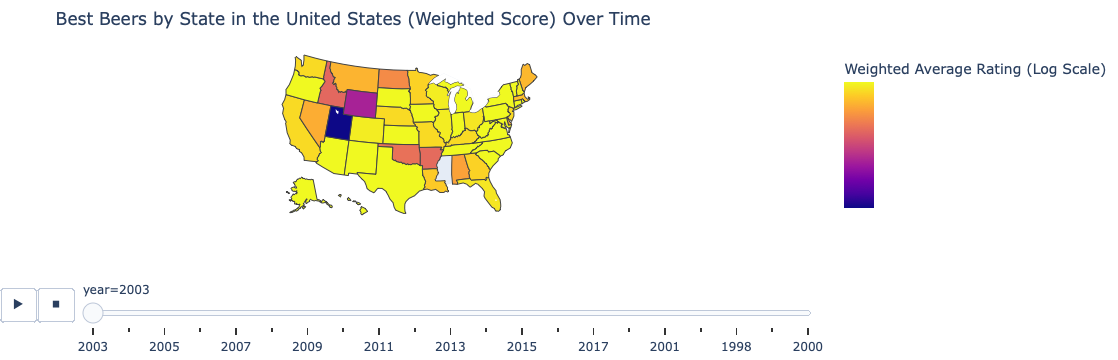

In [30]:
top_ranked_beers_BA_US= weighted_avg_ratings_BA_US[weighted_avg_ratings_BA_US['rank'] == 1]

# Mantieni beer_id e beer_name nel risultato
best_beers_BA_US= top_ranked_beers_BA_US.loc[
    top_ranked_beers_BA_US.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]

# Creazione del pivot per ottenere lo score medio migliore
pivot_data_BA_US = best_beers_BA_US.pivot_table(
    values='weighted_avg_rating',  # Usa il weighted_avg_rating come valore
    index='year',
    columns='location_region_user',
    aggfunc='first'  # Prendi il primo, dato che è già il massimo per ogni gruppo
)

# Ripristina beer_id e beer_name
pivot_long_BA_US = pivot_data_BA_US.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)

# Associa beer_id e beer_name
pivot_long_BA_US = pivot_long_BA_US.merge(
    best_beers_BA_US[['beer_id', 'beer_name', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

# Rimuovi eventuali NaN nei dati risultanti
pivot_long_BA_US = pivot_long_BA_US.dropna(subset=['weighted_avg_rating'])

# Chiama la funzione con il dataset trasformato
utils_beers.plot_US_weighted_avg_map_by_year(pivot_long_BA_US)

In [35]:
review_counts_fl_ba = ratings_BA.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_fl_ba = pd.merge(ratings_BA, review_counts_fl_ba, on=['beer_id'])
filtered_reviews_fl_ba= reviews_with_counts_fl_ba[reviews_with_counts_fl_ba['review_count'] >= 5]

weighted_avg_ratings_fl_ba= filtered_reviews_fl_ba.groupby(['style', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')
weighted_avg_ratings_fl_ba['rank'] = (
    weighted_avg_ratings_fl_ba.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

review_counts_fl_rb = ratings_RB.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_fl_rb = pd.merge(ratings_RB, review_counts_fl_rb, on=['beer_id'])
filtered_reviews_fl_rb = reviews_with_counts_fl_rb[reviews_with_counts_fl_rb['review_count'] >= 5]

weighted_avg_ratings_fl_rb = filtered_reviews_fl_rb.groupby(['style', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')
weighted_avg_ratings_fl_rb['rank'] = (
    weighted_avg_ratings_fl_rb.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

In [36]:
top_ranked_beers_fl_ba = weighted_avg_ratings_fl_ba[weighted_avg_ratings_fl_ba['rank'] == 1]
top_ranked_beers_fl_rb = weighted_avg_ratings_fl_rb[weighted_avg_ratings_fl_rb['rank'] == 1]


In [41]:

def plot_world_map_data_by_weighted_avg_rating_fl(dataset):
    import plotly.express as px
    from iso3166 import countries_by_name

    # Add the column for the logarithm
    dataset['log_weighted_avg_rating'] = np.log1p(dataset['weighted_avg_rating'])

    # Mapping of country names to ISO Alpha-3 codes
    country_to_iso3 = {name.upper(): country.alpha3 for name, country in countries_by_name.items()}

    # Manual mappings for countries with non-matching names
    manual_country_mapping = {
        'United States': 'USA',
        'Russia': 'RUS',
        'United Kingdom': 'GBR',
        'South Korea': 'KOR',
        'Iran': 'IRN',
        'Czech Republic': 'CZE',
        'Georgia': 'GEO',
        # Add further mappings if necessary
    }

    # Mapping country names and adding ISO codes
    dataset['iso_alpha3'] = dataset['location_user'].map(manual_country_mapping).fillna(
        dataset['location_user'].str.upper().map(country_to_iso3)
    )

    # Remove rows with missing ISO codes
    dataset = dataset.dropna(subset=['iso_alpha3'])

    # Create the interactive map with Plotly
    fig = px.choropleth(
        dataset,
        locations="iso_alpha3",
        locationmode="ISO-3",
        color="weighted_avg_rating",
        hover_name="location_user",
        hover_data={
            "weighted_avg_rating": True,
            "style": True,  # Add the beer name to the hover information
            "weighted_avg_rating": False
        },
        animation_frame="year",
        title="Progression of  Best Style Ratings by Country"
    )

    # Update the map layout
    fig.update_geos(
        showcoastlines=True,
        coastlinecolor="Gray"
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        coloraxis_colorbar={
            'title': "Average Rating (Log Scale)",
            'tickvals': [np.log1p(val) for val in [1, 10, 100, 1000, 10000, 100000]],
            'ticktext': ['1', '10', '100', '1k', '10k', '100k']
        }
    )

    # Show the figure
    fig.show()
    #fig.write_html("world_weighted_avg_rating_map_by_year.html")
    

In [45]:
best_fl_BA = top_ranked_beers_fl_ba.loc[
    top_ranked_beers_fl_ba.groupby(['year', 'location_user'])['weighted_avg_rating'].idxmax()
]

# Create pivot table
pivot_data_BA_fl = best_fl_BA.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_BA_fl = pivot_data_BA_fl.reset_index().melt(
    id_vars='year', 
    var_name='location_user', 
    value_name='weighted_avg_rating'
)


pivot_long_BA_fl = pivot_long_BA_fl.merge(
    best_fl_BA[['style', 'year', 'location_user']],
    on=['year', 'location_user'],
    how='left'
)

pivot_long_BA_fl = pivot_long_BA_fl.dropna(subset=['weighted_avg_rating'])


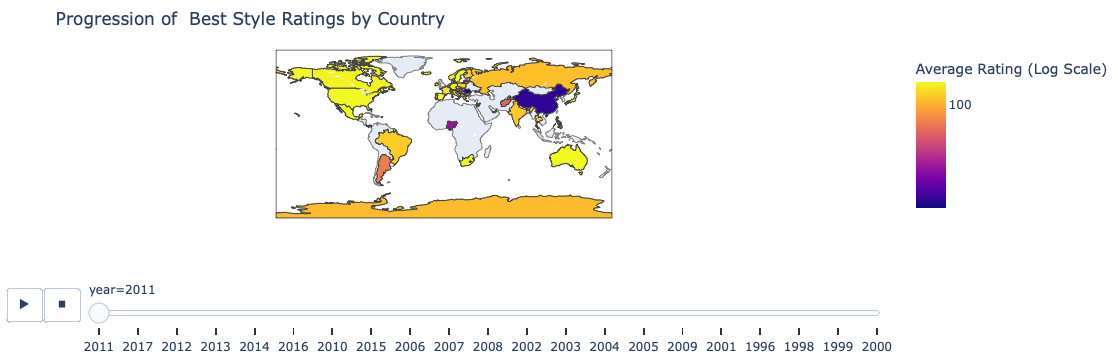

In [44]:
plot_world_map_data_by_weighted_avg_rating_fl(pivot_long_BA_fl)

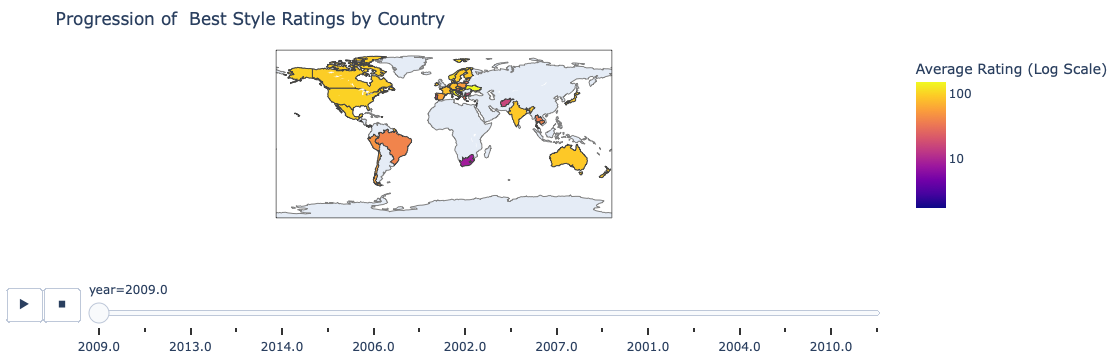

In [46]:
best_fl_RB = top_ranked_beers_fl_rb.loc[
    top_ranked_beers_fl_rb.groupby(['year', 'location_user'])['weighted_avg_rating'].idxmax()
]

# Create pivot table
pivot_data_RB_fl = best_fl_RB.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_RB_fl = pivot_data_RB_fl.reset_index().melt(
    id_vars='year', 
    var_name='location_user', 
    value_name='weighted_avg_rating'
)


pivot_long_RB_fl = pivot_long_RB_fl.merge(
    best_fl_RB[['style', 'year', 'location_user']],
    on=['year', 'location_user'],
    how='left'
)

pivot_long_RB_fl = pivot_long_RB_fl.dropna(subset=['weighted_avg_rating'])
plot_world_map_data_by_weighted_avg_rating_fl(pivot_long_RB_fl)

In [67]:

review_counts_BA_US = ratings_BA_US.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_BA_US = pd.merge(ratings_BA_US, review_counts_BA_US, on=['beer_id'])
filtered_reviews_BA_US = reviews_with_counts_BA_US[reviews_with_counts_BA_US['review_count'] >= 5]

weighted_avg_ratings_BA_US_fl = filtered_reviews_BA_US.groupby(
    ['style', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_BA_US_fl['rank'] = (
    weighted_avg_ratings_BA_US_fl.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)

review_counts_RB_US = ratings_RB_US.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_RB_US = pd.merge(ratings_RB_US, review_counts_RB_US, on=['beer_id'])
filtered_reviews_RB_US = reviews_with_counts_RB_US[reviews_with_counts_RB_US['review_count'] >= 5]

weighted_avg_ratings_RB_US_fl = filtered_reviews_RB_US.groupby(
    ['style', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_RB_US_fl['rank'] = (
    weighted_avg_ratings_RB_US_fl.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)



In [68]:
top_ranked_beers_fl_ba_us = weighted_avg_ratings_BA_US_fl[weighted_avg_ratings_BA_US_fl['rank'] == 1]
top_ranked_beers_fl_rb_us = weighted_avg_ratings_RB_US_fl[weighted_avg_ratings_RB_US_fl['rank'] == 1]

   

In [69]:
best_fl_BA_us = top_ranked_beers_fl_rb_us.loc[
    top_ranked_beers_fl_rb_us.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]


# Create pivot table
pivot_data_BA_fl_us = best_fl_BA_us.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_region_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_BA_fl_us = pivot_data_BA_fl_us.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)


pivot_long_BA_fl_us = pivot_long_BA_fl_us.merge(
    best_fl_BA_us[['style', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

best_fl_RB_us = top_ranked_beers_fl_rb_us.loc[
    top_ranked_beers_fl_rb_us.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]

# Create pivot table
pivot_data_RB_fl_us = best_fl_RB_us.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_region_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_RB_fl_us = pivot_data_RB_fl_us.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)


pivot_long_RB_fl_us = pivot_long_RB_fl_us.merge(
    best_fl_RB_us[['style', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

pivot_long_RB_fl_us = pivot_long_RB_fl_us.dropna(subset=['weighted_avg_rating'])


In [70]:
def plot_US_weighted_avg_map_by_year_fl(dataset):
    """Creates an interactive map of the United States with the weighted average rating by state over time (year)."""
    
    # Map full state names to abbreviations
    us_state_abbrev = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }
    
    # Map the state abbreviations
    dataset['location_region_user'] = dataset['location_region_user'].str.strip()
    dataset['state'] = dataset['location_region_user'].map(us_state_abbrev)
    
    # Remove unmapped states
    dataset = dataset.dropna(subset=['state'])
    
    # Calculate the logarithmic scale for ratings
    dataset['log_weighted_avg_rating'] = np.log1p(dataset['weighted_avg_rating'])
    
    # Create the interactive map with Plotly
    fig = px.choropleth(
        dataset,
        locations="state",
        locationmode="USA-states",
        color="log_weighted_avg_rating",  # Use the logarithmic rating for color
        hover_name="location_region_user",  # Full state name
        hover_data={
            "style": True,  # Show the beer name
            "weighted_avg_rating": True,  # Show the weighted average rating
            "log_weighted_avg_rating": False  # Hide the logarithmic value
        },
        animation_frame="year",  # Animate the map by year
        title="Best Style by State in the United States (Weighted Score) Over Time"
    )
    
    # Update layout to focus on the United States
    fig.update_geos(
        scope="usa",
        showcoastlines=True,
        coastlinecolor="Gray"
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        coloraxis_colorbar={
            'title': "Weighted Average Rating (Log Scale)",
            'tickvals': [np.log1p(val) for val in [1, 10, 100, 1000]],
            'ticktext': ['1', '10', '100', '1k']
        }
    )
    
    # Show the map
    fig.show()
    # Optionally save the map as an HTML file
    # fig.write_html("us_weighted_avg_beer_map_by_year.html")


In [71]:
plot_US_weighted_avg_map_by_year_fl(pivot_long_BA_fl_us)
plot_US_weighted_avg_map_by_year_fl(pivot_long_RB_fl_us)

In [59]:
review_counts_br_ba = ratings_BA.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_br_ba = pd.merge(ratings_BA, review_counts_br_ba, on=['beer_id'])
filtered_reviews_br_ba= reviews_with_counts_br_ba[reviews_with_counts_br_ba['review_count'] >= 5]

weighted_avg_ratings_br_ba= filtered_reviews_br_ba.groupby(['brewery_name', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')
weighted_avg_ratings_br_ba['rank'] = (
    weighted_avg_ratings_br_ba.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

review_counts_br_rb = ratings_RB.groupby(['beer_id']).size().reset_index(name='review_count')
reviews_with_counts_br_rb = pd.merge(ratings_RB, review_counts_br_rb, on=['beer_id'])
filtered_reviews_br_rb = reviews_with_counts_br_rb[reviews_with_counts_br_rb['review_count'] >= 5]

weighted_avg_ratings_br_rb = filtered_reviews_br_rb.groupby(['brewery_name', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')
weighted_avg_ratings_br_rb['rank'] = (
    weighted_avg_ratings_br_rb.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

In [61]:
top_ranked_beers_br_ba = weighted_avg_ratings_br_ba[weighted_avg_ratings_br_ba['rank'] == 1]
top_ranked_beers_br_rb = weighted_avg_ratings_br_rb[weighted_avg_ratings_br_rb['rank'] == 1]


In [64]:
best_br_BA = top_ranked_beers_br_ba.loc[
    top_ranked_beers_br_ba.groupby(['year', 'location_user'])['weighted_avg_rating'].idxmax()
]

# Create pivot table
pivot_data_BA_br = best_br_BA.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_BA_br = pivot_data_BA_br.reset_index().melt(
    id_vars='year', 
    var_name='location_user', 
    value_name='weighted_avg_rating'
)


pivot_long_BA_br = pivot_long_BA_br.merge(
    best_br_BA[['brewery_name', 'year', 'location_user']],
    on=['year', 'location_user'],
    how='left'
)

pivot_long_BA_br = pivot_long_BA_br.dropna(subset=['weighted_avg_rating'])
best_br_RB = top_ranked_beers_br_rb.loc[
    top_ranked_beers_br_rb.groupby(['year', 'location_user'])['weighted_avg_rating'].idxmax()
]

# Create pivot table
pivot_data_RB_br = best_br_RB.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_RB_br = pivot_data_RB_br.reset_index().melt(
    id_vars='year', 
    var_name='location_user', 
    value_name='weighted_avg_rating'
)


pivot_long_RB_br = pivot_long_RB_br.merge(
    best_br_RB[['brewery_name', 'year', 'location_user']],
    on=['year', 'location_user'],
    how='left'
)

pivot_long_RB_br = pivot_long_RB_br.dropna(subset=['weighted_avg_rating'])


In [65]:
def plot_world_map_data_by_weighted_avg_rating_br(dataset):
    import plotly.express as px
    from iso3166 import countries_by_name

    # Add the column for the logarithm
    dataset['log_weighted_avg_rating'] = np.log1p(dataset['weighted_avg_rating'])

    # Mapping of country names to ISO Alpha-3 codes
    country_to_iso3 = {name.upper(): country.alpha3 for name, country in countries_by_name.items()}

    # Manual mappings for countries with non-matching names
    manual_country_mapping = {
        'United States': 'USA',
        'Russia': 'RUS',
        'United Kingdom': 'GBR',
        'South Korea': 'KOR',
        'Iran': 'IRN',
        'Czech Republic': 'CZE',
        'Georgia': 'GEO',
        # Add further mappings if necessary
    }

    # Mapping country names and adding ISO codes
    dataset['iso_alpha3'] = dataset['location_user'].map(manual_country_mapping).fillna(
        dataset['location_user'].str.upper().map(country_to_iso3)
    )

    # Remove rows with missing ISO codes
    dataset = dataset.dropna(subset=['iso_alpha3'])

    # Create the interactive map with Plotly
    fig = px.choropleth(
        dataset,
        locations="iso_alpha3",
        locationmode="ISO-3",
        color="weighted_avg_rating",
        hover_name="location_user",
        hover_data={
            "weighted_avg_rating": True,
            "brewery_name": True,  # Add the beer name to the hover information
            "weighted_avg_rating": False
        },
        animation_frame="year",
        title=" Best Style Brewery by Country across Time"
    )

    # Update the map layout
    fig.update_geos(
        showcoastlines=True,
        coastlinecolor="Gray"
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        coloraxis_colorbar={
            'title': "Average Rating (Log Scale)",
            'tickvals': [np.log1p(val) for val in [1, 10, 100, 1000, 10000, 100000]],
            'ticktext': ['1', '10', '100', '1k', '10k', '100k']
        }
    )

    # Show the figure
    fig.show()
    #fig.write_html("world_weighted_avg_rating_map_by_year.html")
    

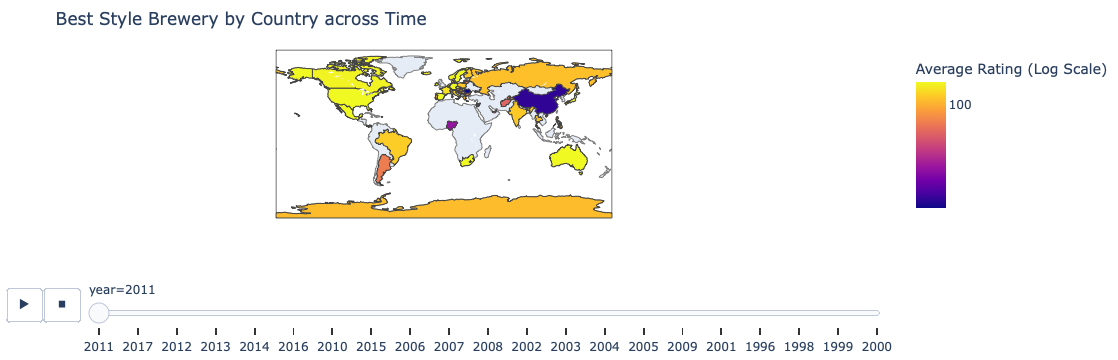

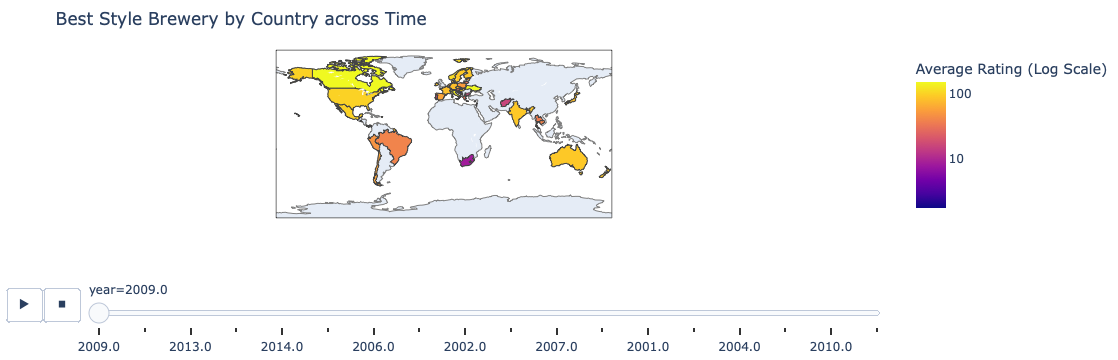

In [66]:
plot_world_map_data_by_weighted_avg_rating_br(pivot_long_BA_br)
plot_world_map_data_by_weighted_avg_rating_br(pivot_long_RB_br)

In [72]:
weighted_avg_ratings_BA_US_br = filtered_reviews_BA_US.groupby(
    ['brewery_name', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_BA_US_br['rank'] = (
    weighted_avg_ratings_BA_US_br.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)


weighted_avg_ratings_RB_US_br = filtered_reviews_RB_US.groupby(
    ['brewery_name', 'year', 'review_count', 'location_region_user']
).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_RB_US_br['rank'] = (
    weighted_avg_ratings_RB_US_br.sort_values(
        ['year', 'location_region_user', 'weighted_avg_rating', 'review_count'],
        ascending=[True, True, False, False]
    )
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)



In [74]:
top_ranked_beers_br_ba_us = weighted_avg_ratings_BA_US_br[weighted_avg_ratings_BA_US_br['rank'] == 1]
top_ranked_beers_br_rb_us = weighted_avg_ratings_RB_US_br[weighted_avg_ratings_RB_US_br['rank'] == 1]

best_br_BA_us = top_ranked_beers_br_rb_us.loc[
    top_ranked_beers_br_rb_us.groupby(['brewery_name', 'location_region_user'])['weighted_avg_rating'].idxmax()
]


# Create pivot table
pivot_data_BA_br_us = best_br_BA_us.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_region_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_BA_br_us = pivot_data_BA_br_us.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)


pivot_long_BA_br_us = pivot_long_BA_br_us.merge(
    best_br_BA_us[['brewery_name', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)

best_br_RB_us = top_ranked_beers_br_rb_us.loc[
    top_ranked_beers_br_rb_us.groupby(['year', 'location_region_user'])['weighted_avg_rating'].idxmax()
]

# Create pivot table
pivot_data_RB_br_us = best_br_RB_us.pivot_table(
    values='weighted_avg_rating', 
    index='year',
    columns='location_region_user',
    aggfunc='first'
)

#  Reshape to long format
pivot_long_RB_br_us = pivot_data_RB_br_us.reset_index().melt(
    id_vars='year', 
    var_name='location_region_user', 
    value_name='weighted_avg_rating'
)


pivot_long_RB_br_us = pivot_long_RB_br_us.merge(
    best_br_RB_us[['brewery_name', 'year', 'location_region_user']],
    on=['year', 'location_region_user'],
    how='left'
)


In [75]:
def plot_US_weighted_avg_map_by_year_br(dataset):
    """Creates an interactive map of the United States with the weighted average rating by state over time (year)."""
    
    # Map full state names to abbreviations
    us_state_abbrev = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
        'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
        'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
        'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }
    
    # Map the state abbreviations
    dataset['location_region_user'] = dataset['location_region_user'].str.strip()
    dataset['state'] = dataset['location_region_user'].map(us_state_abbrev)
    
    # Remove unmapped states
    dataset = dataset.dropna(subset=['state'])
    
    # Calculate the logarithmic scale for ratings
    dataset['log_weighted_avg_rating'] = np.log1p(dataset['weighted_avg_rating'])
    
    # Create the interactive map with Plotly
    fig = px.choropleth(
        dataset,
        locations="state",
        locationmode="USA-states",
        color="log_weighted_avg_rating",  # Use the logarithmic rating for color
        hover_name="location_region_user",  # Full state name
        hover_data={
            "brewery_name": True,  # Show the beer name
            "weighted_avg_rating": True,  # Show the weighted average rating
            "log_weighted_avg_rating": False  # Hide the logarithmic value
        },
        animation_frame="year",  # Animate the map by year
        title="Best Breweries by State in the United States (Weighted Score) Over Time"
    )
    
    # Update layout to focus on the United States
    fig.update_geos(
        scope="usa",
        showcoastlines=True,
        coastlinecolor="Gray"
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        coloraxis_colorbar={
            'title': "Weighted Average Rating (Log Scale)",
            'tickvals': [np.log1p(val) for val in [1, 10, 100, 1000]],
            'ticktext': ['1', '10', '100', '1k']
        }
    )
    
    # Show the map
    fig.show()
    # Optionally save the map as an HTML file
    # fig.write_html("us_weighted_avg_beer_map_by_year.html")


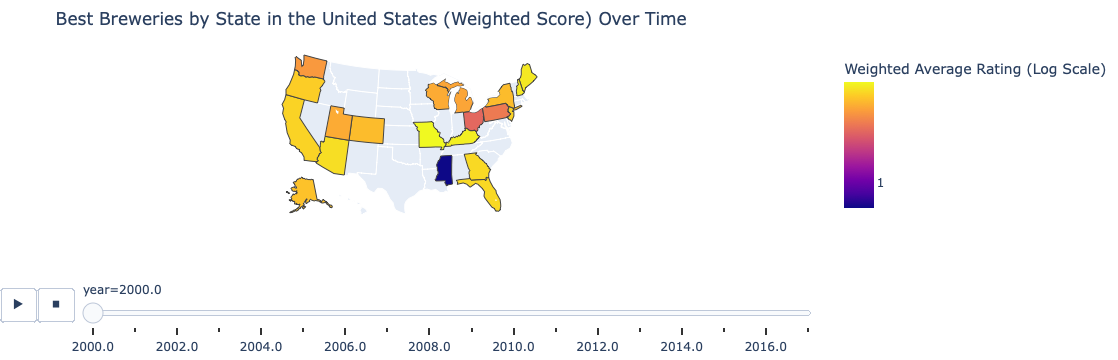

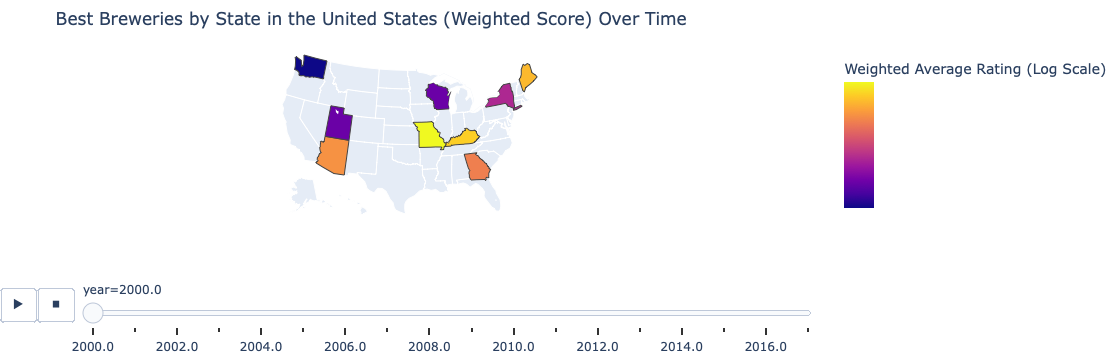

In [78]:
plot_US_weighted_avg_map_by_year_br(pivot_long_RB_br_us)
plot_US_weighted_avg_map_by_year_br(pivot_long_BA_br_us)